<a href="https://colab.research.google.com/github/tuankietsieucapvippro/digit-recognition-cnn/blob/main/ML_nhandangso_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown


# File ID của 0-9 (bạn cần thay ID đúng)
file_id_digits = "1bd3BhnreVMHV3fcuQuxfFxAbnJmeq_0W"
url_digits = f"https://drive.google.com/uc?id={file_id_digits}"
gdown.download(url_digits, "0_9_Handwritten_Data.csv", quiet=False)

print("Tải file thành công!")


Downloading...
From (original): https://drive.google.com/uc?id=1bd3BhnreVMHV3fcuQuxfFxAbnJmeq_0W
From (redirected): https://drive.google.com/uc?id=1bd3BhnreVMHV3fcuQuxfFxAbnJmeq_0W&confirm=t&uuid=18d5dd47-f53c-4eb7-bf38-29de284b8f0a
To: /content/0_9_Handwritten_Data.csv
100%|██████████| 110M/110M [00:00<00:00, 236MB/s] 

Tải file thành công!


In [ ]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("0_9_Handwritten_Data.csv")

print(df.shape)  # Kiểm tra số dòng và cột
print(df.head())  # Hiển thị một số dòng đầu tiên


(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [ ]:
import pandas as pd

# Xem vài dòng đầu tiên
print(df.head())

# Kiểm tra kích thước dataset
print("Dataset shape:", df.shape)

# Kiểm tra giá trị bị thiếu
print("Missing values:\n", df.isnull().sum().sum())

# Kiểm tra kiểu dữ liệu
print(df.dtypes)


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Dataset shape: (60000, 785)
Missing values:
 0
label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25  

In [ ]:
import numpy as np

# Xác định nhãn
labels = df.iloc[:, 0]
print("Số lượng mỗi chữ cái:")
print(labels.value_counts())

# Kiểm tra một dòng dữ liệu
print("\nVí dụ một dòng dữ liệu:")
print(df.iloc[0, 1:].values.reshape(28, 28))  # Chuyển về ma trận 28x28


Số lượng mỗi chữ cái:
label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Ví dụ một dòng dữ liệu:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [

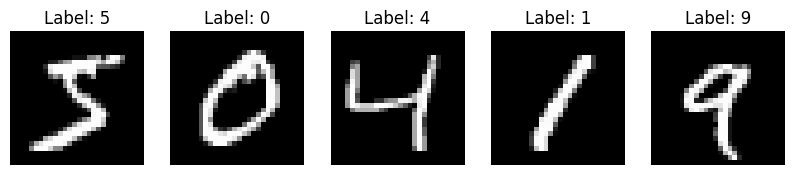

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị 5 hình ảnh ngẫu nhiên
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

for i, ax in enumerate(axes):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Lấy dòng i và reshape thành ảnh
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {labels.iloc[i]}")
    ax.axis("off")

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tách features và labels
X = df.iloc[:, 1:].values / 255.0  # Chia cho 255 để chuẩn hóa
y = to_categorical(df.iloc[:, 0].values, num_classes=10)  # One-hot encoding

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (48000, 784) (48000, 10)
Test shape: (12000, 784) (12000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

# Xây dựng mô hình CNN
model = Sequential([
    Reshape((28, 28, 1), input_shape=(784,)),  # Chuyển thành ảnh 28x28
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 lớp output cho 0-9
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị kiến trúc model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7859 - loss: 0.6786 - val_accuracy: 0.9776 - val_loss: 0.0756
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9645 - loss: 0.1175 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9753 - loss: 0.0843 - val_accuracy: 0.9853 - val_loss: 0.0476
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9796 - loss: 0.0690 - val_accuracy: 0.9871 - val_loss: 0.0430
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0554 - val_accuracy: 0.9868 - val_loss: 0.0446
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0492 - val_accuracy: 0.9897 - val_loss: 0.0361
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9892 - loss: 0.0383 - val_accuracy: 0.9899 - val_loss: 0.0347
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Độ chính xác trên tập test: {test_acc * 100:.2f}%")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0305
Độ chính xác trên tập test: 99.09%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


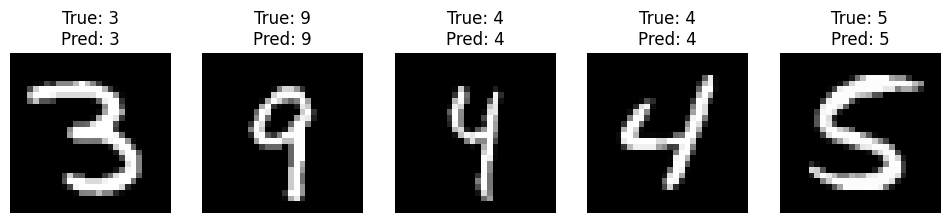

In [ ]:
import random

# Chọn ngẫu nhiên 5 mẫu từ tập test
num_samples = 5
indices = random.sample(range(len(X_test)), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28)  # Reshape về ảnh 28x28
    true_label = np.argmax(y_test[idx])
    pred_label = np.argmax(model.predict(X_test[idx].reshape(1, -1)))


    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis("off")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Số dự đoán: 6


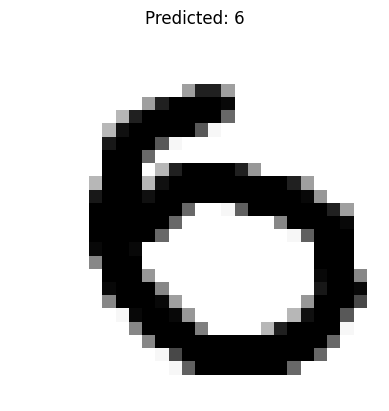

In [ ]:
import cv2
import numpy as np

# Đọc ảnh grayscale
img = cv2.imread('/content/sample.png', cv2.IMREAD_GRAYSCALE)

# Resize về 28x28
img = cv2.resize(img, (28, 28))

# Đảo màu nếu cần (nền đen chữ trắng)
img = cv2.bitwise_not(img)

# Chuyển về tensor 1D và chuẩn hóa
img = img.reshape(1, 784) / 255.0

# Dự đoán
prediction = model.predict(img)
pred_label = np.argmax(prediction)

print(f"Số dự đoán: {pred_label}")
import matplotlib.pyplot as plt

# Hiển thị ảnh
plt.imshow(cv2.imread('/content/sample.png', cv2.IMREAD_GRAYSCALE), cmap="gray")
plt.title(f"Predicted: {pred_label}")
plt.axis("off")  # Ẩn trục
plt.show()
